In [24]:
import numpy
from matplotlib import pyplot
import math
%matplotlib inline

In [25]:
N=51 #the number of points
x_start, x_end= -2.0, 2.0
y_start, y_end= -0.5, 0.5
x=numpy.linspace(x_start,x_end, num=N)
y=numpy.linspace(y_start, y_end, num=N)
X, Y=numpy.meshgrid(x,y)
#pyplot.plot(X,Y);

In [43]:
# create the vorticies

strength=5.0 #strength of individual vorticies
n=12 #number of vorticies
#a=(x_end-x_start)/(n-1) #the spacing between vorticies 
#see MAE_6286_lesson_5
#print(a)
xs=numpy.linspace(x_start+0.1, x_end-0.1, num=n)
ys=numpy.zeros_like(xs)
#print(xs)
#print(len(xs))
#print(ys)
#print(len(ys))
a=xs[1]-xs[0]
#print(a)

In [44]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    u=strength / (2*math.pi)*(Y-yv) / ((X-xv)**2+(Y-yv)**2)
    v=-strength / (2*math.pi)*(X-xv) / ((X-xv)**2 + (Y-yv)**2)
    return u, v

u=numpy.zeros((N,N))
v=numpy.zeros((N,N))
for i in range (0,12):
    u_source,v_source=get_velocity_vortex(strength, xs[i], ys[i], X, Y)
    u=u+u_source
    v=v+v_source


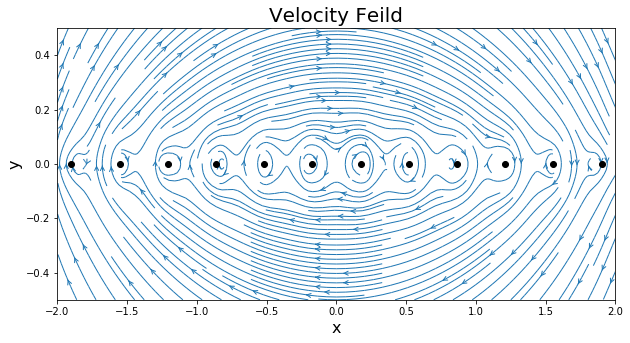

In [45]:
width=10
height=5
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Velocity Feild', fontsize=20)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->');
pyplot.plot(xs,ys,'ok' ,color="k", alpha=1.0);

In [52]:
# create the analytical solution

# find a
a=xs[1]-xs[0]
#a=(x_end-x_start)/n
#print(a)

def analytical_vel(strength, X, Y,a):
    U=(strength/(2*a))*(numpy.sinh(2*math.pi*Y/a)/(numpy.cosh(2*math.pi*Y/a)-\
                                                   numpy.cos(2*math.pi*X/a)))
    V=(-strength/(2*a))*(numpy.sin(2*math.pi*X/a)/(numpy.cosh(2*math.pi*Y/a)-\
                                                   numpy.cos(2*math.pi*X/a)))
    return U,V

U,V=analytical_vel(strength,X,Y,a)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


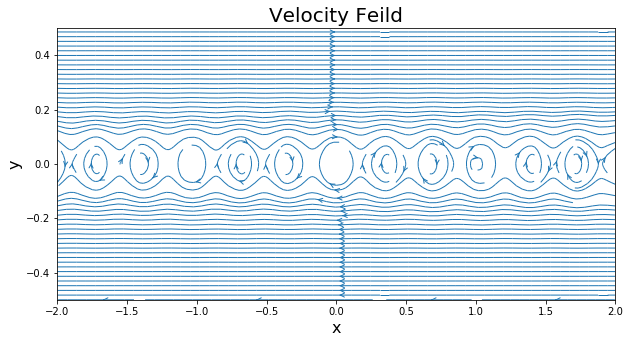

In [53]:
width=10
height=5
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Velocity Feild', fontsize=20)
pyplot.streamplot(X, Y, U, V, density=2, linewidth=1, arrowsize=1, arrowstyle='->');
#pyplot.plot(xs,ys,'ok' ,color="k", alpha=1.0);